In [1]:
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import data1 as data

### Read data & format

In [2]:
df_extrafull = pd.read_csv('extra_full_performance.csv')
df_extra_average = pd.read_csv('extra_average_performance.csv')
df_inter_average = pd.read_csv('inter_average_performance.csv')
df_interfull = pd.read_csv('inter_full_performance.csv')

In [3]:
df_extrafull['mean_train_error'] = 1-df_extrafull['mean_train_accuracy']
df_extrafull['std_train_error'] = df_extrafull['std_train_accuracy']
df_extrafull['mean_test_error'] = 1-df_extrafull['mean_test_accuracy']
df_extrafull['std_test_error'] = df_extrafull['std_test_accuracy']

In [4]:
df_extrafull.set_index('Unnamed: 0', inplace=True)
df_extrafull.index.name = None
df_extra_average.set_index('Unnamed: 0', inplace=True)
df_extra_average.index.name = None
df_inter_average.set_index('Unnamed: 0', inplace=True)
df_inter_average.index.name = None
df_interfull.set_index('Unnamed: 0', inplace=True)
df_interfull.index.name = None

In [5]:
def plot_summary(metric, summ, num_reps=30, baseline=None, names=None, colors = list(mcolors.BASE_COLORS.keys())):
    width = 0.35
    ind = np.arange(len(summ))
    plt.bar(ind-width/2, summ[f'mean_train_{metric}'], width=width, label='train', 
            yerr=summ[f'std_train_{metric}']/num_reps**0.5, capsize=3.0)
    plt.bar(ind+width/2, summ[f'mean_test_{metric}'], width=width, label='test',
            yerr=summ[f'std_test_{metric}']/num_reps**0.5, capsize=3.0)
    if baseline:
        for i in range(len(baseline)):
            plt.axhline(y=baseline[i], color=colors[i], linestyle='-', label=names[i])
    plt.ylabel(metric)
    plt.legend()
    plt.xticks(ind, summ.index)

### Data Overview

In [6]:
df_extrafull # full phase extrapolation

,mean_train_accuracy,std_train_accuracy,mean_test_accuracy,std_test_accuracy,mean_train_log loss,std_train_log loss,mean_test_log loss,std_test_log loss,mean_train_error,std_train_error,mean_test_error,std_test_error
LR,0.383107,0.022709,0.400911,0.400362,2.907224,0.018351,3.477735,2.683668,0.616893,0.022709,0.599089,0.400362
RF,0.999476,0.000929,0.665978,0.392974,0.241109,0.005626,2.591146,3.969736,0.000524,0.000929,0.334022,0.392974
Rufit,0.957413,0.006143,0.560884,0.413363,0.371222,0.011933,2.925191,2.931685,0.042587,0.006143,0.439116,0.413363
GAM,0.641656,0.479840,0.538279,0.411800,0.886580,0.649313,0.629749,0.321377,0.358344,0.479840,0.461721,0.411800


In [7]:
df_extra_average # average phases extrapolation

,mean_train_accuracy,std_train_accuracy,mean_test_accuracy,std_test_accuracy,mean_train_log loss,std_train_log loss,mean_test_log loss,std_test_log loss,mean_train_error,std_train_error,mean_test_error,std_test_error
LR,0.713494,0.010429,0.764923,0.252724,0.503709,0.008109,0.541819,0.468606,0.286506,0.010429,0.235077,0.252724
RF,1.000000,0.000000,0.819865,0.212184,0.044277,0.001863,0.608658,1.445836,0.000000,0.000000,0.180135,0.212184
Rufit,0.989547,0.002971,0.800351,0.206882,0.058578,0.003765,0.612193,0.664327,0.010453,0.002971,0.199649,0.206882
GAM,0.887002,0.292160,0.838275,0.248427,0.221645,0.249120,0.157437,0.131517,0.112998,0.292160,0.161725,0.248427


In [36]:
df_interfull # full phase interpolation

,mean_train_accuracy,std_train_accuracy,mean_test_accuracy,std_test_accuracy,mean_train_log loss,std_train_log loss,mean_test_log loss,std_test_log loss,mean_train_error,std_train_error,mean_test_error,std_test_error
LR,0.713494,0.010429,0.764923,0.252724,0.503709,0.008109,0.541819,0.468606,0.286506,0.010429,0.235077,0.252724
RF,1.000000,0.000000,0.819865,0.212184,0.044277,0.001863,0.608658,1.445836,0.000000,0.000000,0.180135,0.212184
Rufit,0.989547,0.002971,0.800351,0.206882,0.058578,0.003765,0.612193,0.664327,0.010453,0.002971,0.199649,0.206882
GAM,0.887002,0.292160,0.838275,0.248427,0.221645,0.249120,0.157437,0.131517,0.112998,0.292160,0.161725,0.248427


In [37]:
df_inter_average # average phase interpolation

,mean_train_accuracy,std_train_accuracy,mean_test_accuracy,std_test_accuracy,mean_train_log loss,std_train_log loss,mean_test_log loss,std_test_log loss,mean_train_error,std_train_error,mean_test_error,std_test_error
LR,0.713376,0.004852,0.712434,0.095129,0.504037,0.003005,0.507281,0.086280,0.286624,0.004852,0.287566,0.095129
RF,1.000000,0.000000,0.933728,0.052051,0.044982,0.001479,0.198928,0.221424,0.000000,0.000000,0.066272,0.052051
Rufit,0.989370,0.002744,0.930241,0.048868,0.059503,0.003065,0.187712,0.122474,0.010630,0.002744,0.069759,0.048868
GAM,0.887055,0.292179,0.865132,0.301677,0.223409,0.249875,0.223139,0.241809,0.112945,0.292179,0.134868,0.301677


### Calculate the base line
1. Informed baseline: 
    * based on the most frequent observations
2. Uninformed baseline: 
    * uniform guessing

__Interpolation Error baseline__

In [11]:
# interpolation full sphase
uniq, cnts = np.unique(data.y.values, return_counts=True, axis=0)
inter_full_info_error = 1 - max(cnts)/sum(cnts)
inter_full_uinfo_error = 1 - (1/2)**4
print('Interpolation full sphase error base line:\nInform error:{} \nUninform error:{}'.format(inter_full_info_error, inter_full_uinfo_error))


Interpolation full sphase error base line:
Inform error:0.5912162162162162 
Uninform error:0.9375


In [10]:
# interpolation average
inter_avg_info_error = []
for each in [data.sphere, data.vesicle, data.worm, data.other]:
    uniq, cnt = np.unique(each, return_counts=True)
    prob = cnt/sum(cnt)
    inter_avg_info_error.append((1-max(prob)))

inter_avg_unifo_error = [0.5, 0.5, 0.5, 0.5]

inter_avg_info_error = np.mean(inter_avg_info_error)
inter_avg_unifo_error = np.mean([0.5, 0.5, 0.5, 0.5])
print('Interpolation average sphases error base line:\nInform error:{} \nUninform error:{}'.format(inter_avg_info_error, inter_avg_unifo_error))


Interpolation average sphases error base line:
Inform error:0.27956081081081074 
Uninform error:0.5


__Extrapolation Error baseline__

__Interpolation negative loglikelihood baseline__

__Extrapolation negative loglikelihood baseline__

In [9]:
def cm2inch(*tupl):
    """This function is for the actual size (cm) of plots
    Input: 
        tuple: for example (12, 13) means 12cm, 13 cm
    Output:
        tuple: for python figsize
    """
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

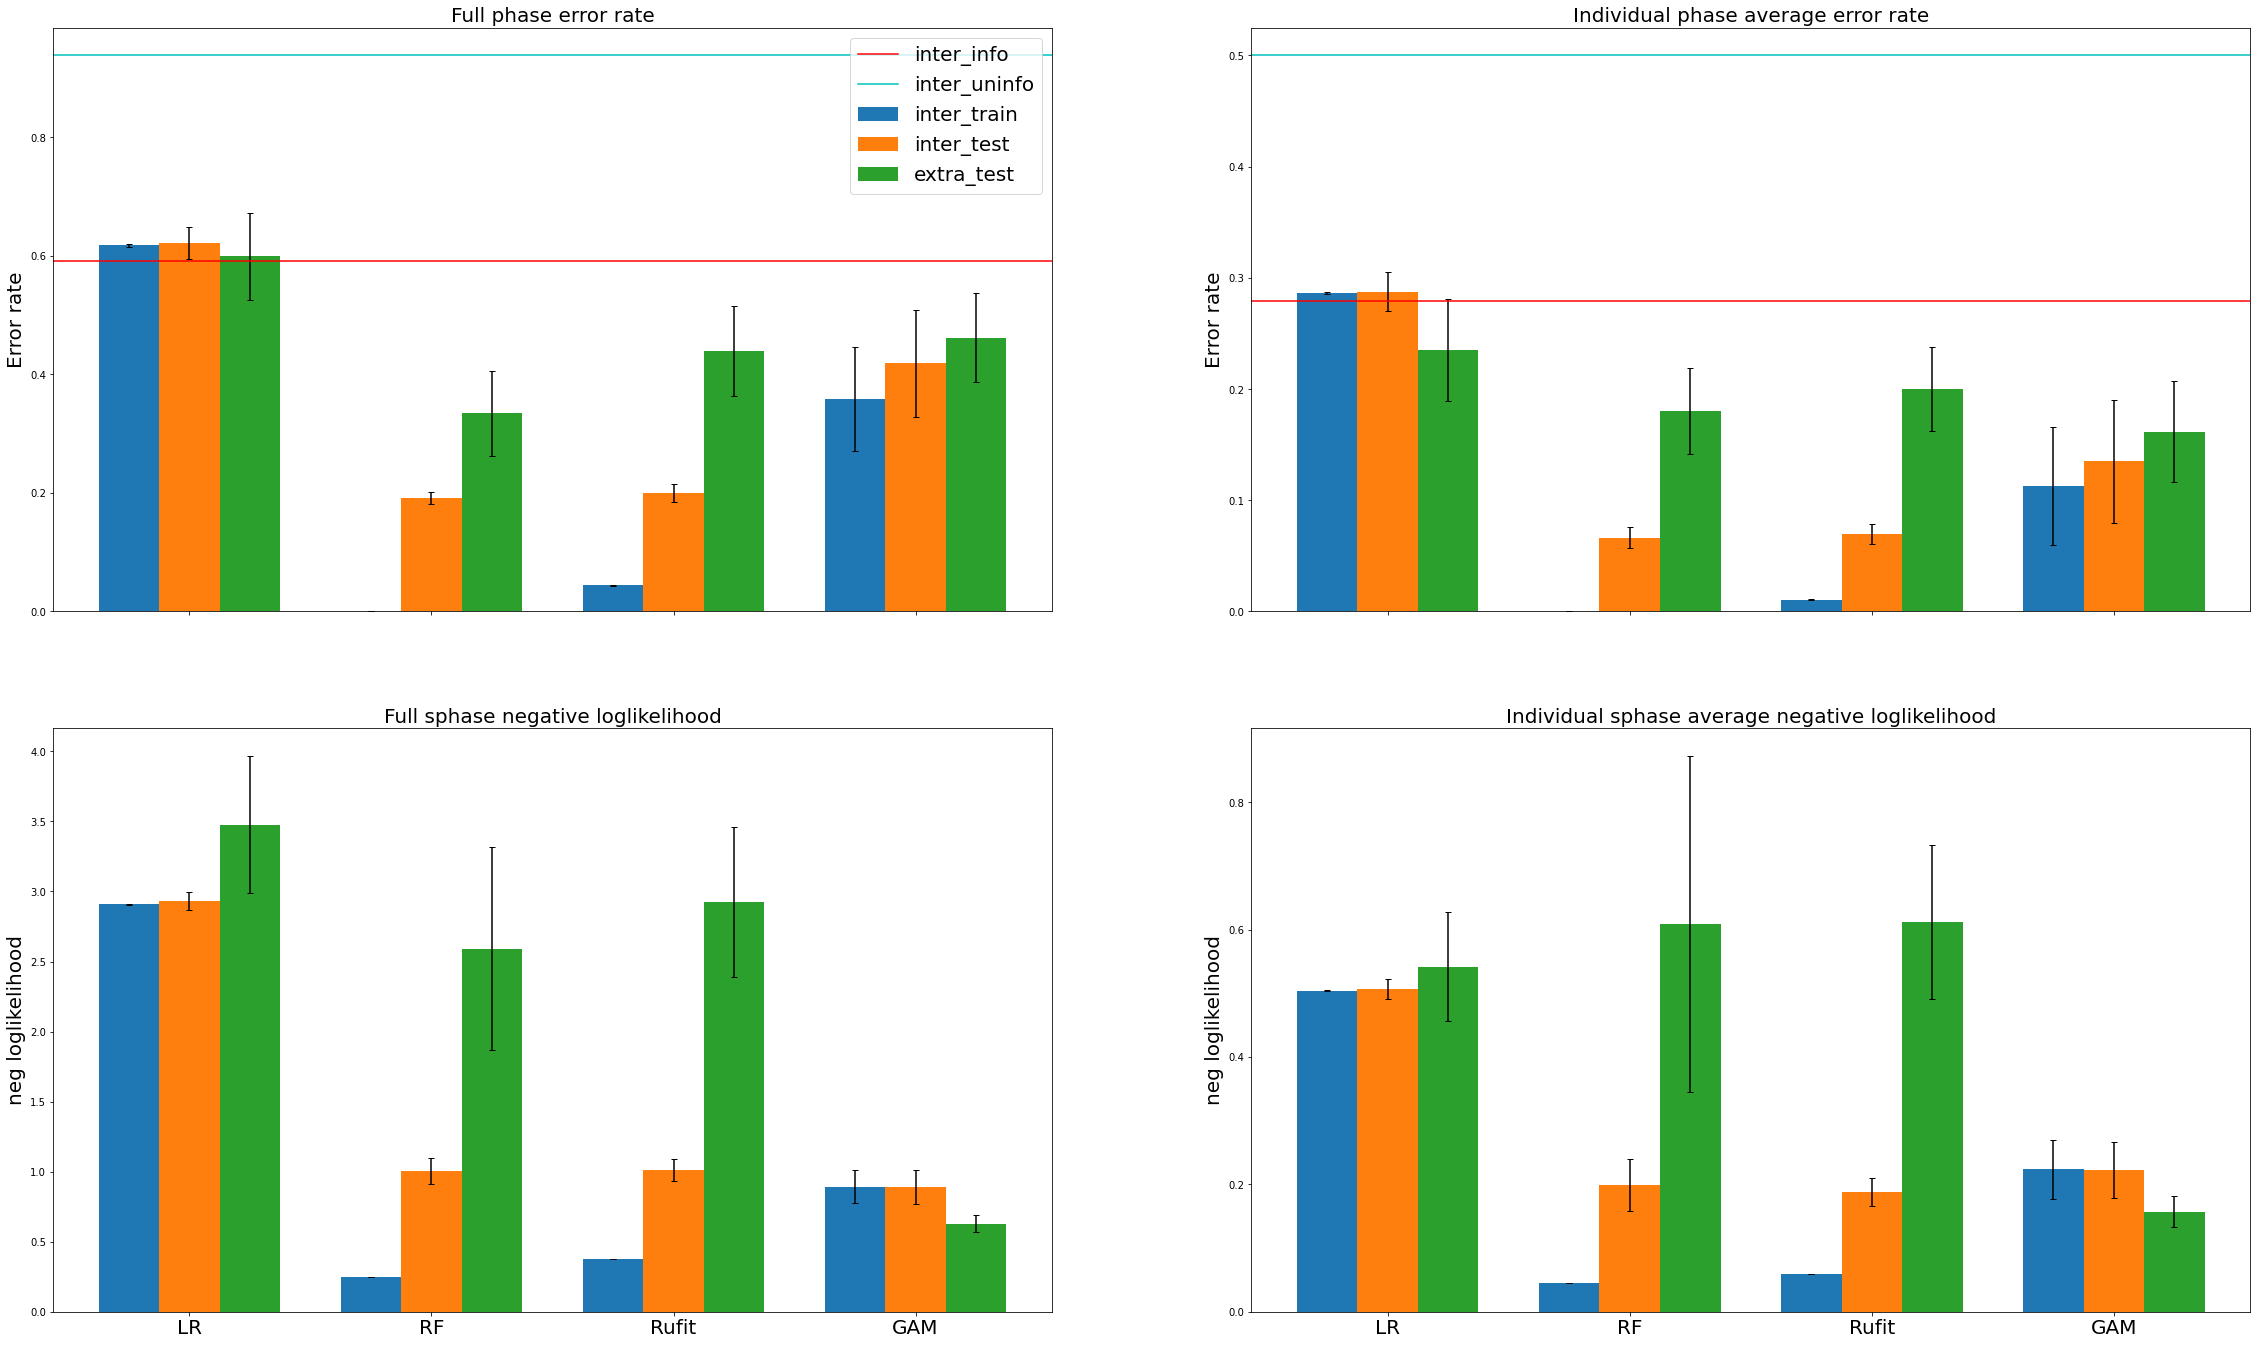

In [35]:
colors = ['r', 'c', 'm', 'y']
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharey=False, sharex=True)
fig.set_size_inches(cm2inch(100, 60))

width = 0.25
ind = np.arange(len(df_extrafull))
ax1.bar(ind-width, df_interfull[f'mean_train_error'], width=width, label='inter_train', 
        yerr=df_interfull[f'std_train_error']/30**0.5, capsize=3.0)
ax1.bar(ind, df_interfull[f'mean_test_error'], width=width, label='inter_test',
        yerr=df_interfull[f'std_test_error']/30**0.5, capsize=3.0)
ax1.bar(ind+width, df_extrafull[f'mean_test_error'], width=width, label='extra_test',
        yerr=df_extrafull[f'std_test_error']/30**0.5, capsize=3.0)

# add base line
inter_error_base = [inter_full_info_error, inter_full_uinfo_error]#, extra_full_info_error, extra_full_uinfo_error]
inter_error_name = ['inter_info', 'inter_uninfo', 'extra_info', 'extra_uninfo']
for i in range(len(inter_error_base)):
    ax1.axhline(y=inter_error_base[i], color=colors[i], linestyle='-', label=inter_error_name[i])

ax1.set_title('Full phase error rate', fontsize=20)
ax1.set_xticks(ind)
ax1.set_xticklabels(df_extrafull.index, fontsize=20)
ax1.set_ylabel('Error rate', fontsize=20)
ax1.legend(fontsize=20)


ax2.bar(ind-width, df_inter_average[f'mean_train_error'], width=width, label='inter_train', 
        yerr=df_inter_average[f'std_train_error']/30**0.5, capsize=3.0)
ax2.bar(ind, df_inter_average[f'mean_test_error'], width=width, label='inter_test',
        yerr=df_inter_average[f'std_test_error']/30**0.5, capsize=3.0)
ax2.bar(ind+width, df_extra_average[f'mean_test_error'], width=width, label='extra_test',
        yerr=df_extra_average[f'std_test_error']/30**0.5, capsize=3.0)

ax2.set_title('Individual phase average error rate', fontsize=20)
ax2.set_xticks(ind)
ax2.set_ylabel('Error rate', fontsize=20)
ax2.set_xticklabels(df_extrafull.index, fontsize=20)

# add base line
avg_error_base = [inter_avg_info_error, inter_avg_unifo_error]#, extra_full_info_error, extra_full_uinfo_error]
avg_error_name = ['inter_info', 'inter_uninfo', 'extra_info', 'extra_uninfo']
for i in range(len(avg_error_base)):
    ax2.axhline(y=avg_error_base[i], color=colors[i], linestyle='-', label=avg_error_name[i])



ax3.bar(ind-width, df_interfull[f'mean_train_log loss'], width=width, label='inter_train', 
        yerr=df_interfull[f'std_train_log loss']/30**0.5, capsize=3.0)
ax3.bar(ind, df_interfull[f'mean_test_log loss'], width=width, label='inter_test',
        yerr=df_interfull[f'std_test_log loss']/30**0.5, capsize=3.0)
ax3.bar(ind+width, df_extrafull[f'mean_test_log loss'], width=width, label='extra_test',
        yerr=df_extrafull[f'std_test_log loss']/30**0.5, capsize=3.0)

ax3.set_title('Full sphase negative loglikelihood', fontsize=20)
ax3.set_xticks(ind)
ax3.set_xticklabels(df_extrafull.index, fontsize=20)
ax3.set_ylabel('neg loglikelihood', fontsize=20)


ax4.bar(ind-width, df_inter_average[f'mean_train_log loss'], width=width, label='inter_train', 
        yerr=df_inter_average[f'std_train_log loss']/30**0.5, capsize=3.0)
ax4.bar(ind, df_inter_average[f'mean_test_log loss'], width=width, label='inter_test',
        yerr=df_inter_average[f'std_test_log loss']/30**0.5, capsize=3.0)
ax4.bar(ind+width, df_extra_average[f'mean_test_log loss'], width=width, label='extra_test',
        yerr=df_extra_average[f'std_test_log loss']/30**0.5, capsize=3.0)

ax4.set_title('Individual sphase average negative loglikelihood', fontsize=20)
ax4.set_xticks(ind)
ax4.set_xticklabels(df_extrafull.index, fontsize=20)
ax4.set_ylabel('neg loglikelihood', fontsize=20)

plt.show()

In [55]:
## df_extrafull